# **Project Name** -  utomobile import price prediction.

##### **Project Type**    - Regression
##### **Contribution**    - Individual.
##### **Member Name -** Ashwini Shindalkar.
##### **Task -** 2

# **Project Summary**-

**Objective:** Develop a machine learning model to predict car prices based on various influencing factors.

**Why Car Price Prediction?** Car prices are influenced by numerous variables, including brand reputation, features, horsepower, and fuel efficiency. Machine learning models can provide accurate price predictions.

**Key Tasks:**

1. **Data Collection:** Gather data on various car attributes and their corresponding prices.
2. **Data Preprocessing:** Clean, transform, and prepare the data for modeling.
3. **Feature Engineering:** Identify the most important features for price prediction.
4. **Model Building:** Create a machine learning model capable of predicting car prices.
5. **Model Evaluation:** Assess the model's accuracy and performance using appropriate metrics.
6. **Deployment:** Make the trained model available for car price predictions.

**Benefits:** By completing this project, we'll gain valuable insights into machine learning, data analysis, and the automotive industry. We'll also have a functional car price prediction model that can be useful for future car pricing decisions.

# **BUSINESS CASE** -

<span style="font-family: Arial, sans-serif; font-size: 14px; color: black;">This is an Automobile Imports 
Data set Which contains various characteristics of the cars 
including insurance risk rating and other price indicators.
The target is to predict the price of the cars.</span>

**Key Objectives:**
- Task 1:-Prepare a complete data analysis report on the given data.
  
- Task 2:-Create a predictive model by applying some data science techniques for the price 
of cars with the available independent variables. That should help the management to 
understand how exactly the prices vary with the independent variables. They can 
accordingly manipulate the design of the cars, the business strategy etc. to meet certain 
price levels.


# ***Let's Begin !***

### **1.Domain Analysis**

....importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


....loading data

In [2]:
data=pd.read_csv("auto_imports.csv")
data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#### **change column names** -  
<span style="font-family: Arial, sans-serif; font-size: 15px; color: black;">this is car price prediction  ths Attributes names are different and not understandable for the better understanding we have to change the columns names.</span>

In [3]:
new_names = {'3':'symboling', '?':'normalized-losses', 'alfa-romero':'make', 'gas':'fuel-type', 'std':'aspiration', 'two':'num-of-doors', 'convertible':'body-style', 'rwd':'drive-wheels',
       'front':'engine-location', '88.60':'wheel-base', '168.80':'length', '64.10':'width', '48.80':'height', '2548':'curb-weight', 'dohc':'engine-type', 'four':'num-of-cylinders',
       '130':'engine-size', 'mpfi':'fuel-system', '3.47':'bore', '2.68':'stroke', '9.00':'compression-ratio', '111':'horsepower', '5000':'peak-rmp', '21':'city-mpg', '27':'highway-mpg',
       '13495':'price'}
data=data.rename(columns=new_names)

#### **Basic checks**

#### first five rows

In [4]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


#### Last five rows

In [5]:
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
data.shape

(200, 26)

#### **Observation about Data** -

* there is the 5 rows and 26 columns prasent in the above Dataset.

* Based on the given attributes,it's the resonable to assume that the 'price' column is the output or target variable.
This is because it's often the primary metric of intrest when analysing car data , and it's influenced by various factors
like engine size ,fuel efficiency, and features.


#### duplicate values

In [7]:
duplicated_values_count= len(data[data.duplicated()])
print("Number of duplicated values:",duplicated_values_count)

Number of duplicated values: 0


In [8]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rmp             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

#### **Observations**-

* Total attributes=26
   , 5 float
   , 6 int
   , 15object.
  
* No duplicate value prasent in the dataset.

* From the given information provided within the data,There is in data the question mark(?) is prasent in many columns instead of null ,so the missing values are not showing in the data ,the question mark(?)means value is not prasent so ,the question mark we can consider as the missing values. In machine learning ,handling missing values is a crucial preprocessing step. when question marks are used to represent missing values . we have to covert question mark into nan.


#### **Replace ' ? ' into nan**

In [10]:
data=data.replace('0',np.nan)

In [11]:
data=data.replace('?',np.nan)

In [12]:
data.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rmp              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

#### **Observations**-

* after replacing we can see the all null values prasent in each columns.
* 36 null values in "Normalised losses" column.
* 2 null values prasent in "num-of-doors" column.
* 4 null values present in "bore" column.
* 4 null values prasent in "stroke" column.
* 2 null values prasent in "horsepower" column.
* 2 null values prasent in "peak-rmp" column.

### *Changing the Datatype.

The column initially has an object (string) datatype due to the presence of non-numeric values like '?'.
Converting a data column from an object (string) type to a numeric type is essential for accurate data analysis. This conversion enables the performance of numerical operations, such as calculating means or correlations, which are not possible with object types. Additionally, many machine learning algorithms require numeric inputs and cannot process object types directly. Handling missing values, represented as NaN, is more straightforward with numeric types, as NaN is incompatible with object types. Furthermore, visualizations and statistical analyses interpret numeric data correctly, ensuring accurate insights. 

#### we have  five columns with different datatype 

In [13]:
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'])
data['bore'] = pd.to_numeric(data['bore'])
data['stroke'] = pd.to_numeric(data['stroke'])
data['horsepower'] = pd.to_numeric(data['horsepower'])
data['peak-rmp'] = pd.to_numeric(data['peak-rmp'])


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       198 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

### **Variable discription**

**1. symboling :-** A risk factor assigned by the insurance company.

**2. normalized-losses :-** The relative average loss payment per insured vehicle year.

**3. make :-** The manufacturer of the car (e.g., 'alfa-romero', 'audi', 'bmw').

**4.fuel-type :-** The type of fuel used by the car (e.g., 'gas', 'diesel').

**5. aspiration :-** Type of engine (e.g., 'std' for standard, 'turbo').

**6. num-of-doors :-** The number of doors on the car (e.g., 'two', 'four').

**7. body-style :-** The body type of the car (e.g., 'sedan', 'hatchback', 'wagon').

**8. drive-wheels :-** The type of drive system (e.g., 'rwd' for rear-wheel drive, 'fwd' for front-wheel drive).

**9. engine-location :-** The position of the engine in the car (e.g., 'front', 'rear').

**10. wheel-base :-** The distance between the centers of the front and rear wheels.

**11. length :-** The overall length of the car.

**12. width:-** The overall width of the car.

**13. height :-** The overall height of the car.

**14. curb-weight :-** The weight of the car without passengers or cargo.

**15. engine-type :-** The type of engine design (e.g., 'dohc' for double overhead cam).

**16. num-of-cylinders :-** The number of cylinders in the engine (e.g., 'four', 'six', 'eight').

**17. engine-size :-**  The displacement of the engine (in cubic inches).

**18. fuel-system :-** The fuel delivery system of the engine (e.g., 'mpfi' for multi-point fuel injection).

**19. bore :-** The diameter of the cylinders.

**20. stroke: -** The distance traveled by the piston within the cylinder.

**21. compression-ratio  :-** The ratio of the volume of the combustion chamber at its largest point to its smallest point.

**22. horsepower :-** The power output of the engine.

**23. peak-rpm :-** The engine speed at which the maximum horsepower is achieved.

**24. city-mpg :-**  Fuel efficiency in miles per gallon (MPG) within city driving conditions.

**25. highway-mpg :-** Fuel efficiency in miles per gallon (MPG) in highway driving conditions.

**26. price :-** The price of the car.

### ***2. Understanding The Variables***

In [15]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rmp', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [16]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,200.0,0.830000,1.248557,-2.00,0.000,1.00,2.000,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.000,115.00,150.000,256.00
wheel-base,200.0,98.848000,6.038261,86.60,94.500,97.00,102.400,120.90
length,200.0,174.228000,12.347132,141.10,166.675,173.20,183.500,208.10
width,200.0,65.898000,2.102904,60.30,64.175,65.50,66.675,72.00
height,200.0,53.791500,2.428449,47.80,52.000,54.10,55.525,59.80
curb-weight,200.0,2555.705000,518.594552,1488.00,2163.000,2414.00,2928.250,4066.00
engine-size,200.0,126.860000,41.650501,61.00,97.750,119.50,142.000,326.00
bore,196.0,3.330000,0.271303,2.54,3.150,3.31,3.590,3.94
stroke,196.0,3.259847,0.317383,2.07,3.110,3.29,3.410,4.17


#### **Observations**-

* High variability in normalized losses.
* Wide range of values for engine size and compression ratio.
* Presence of potential outliers in several features, including normalized losses and engine size.
* Concentrated distribution for wheel-base compared to normalized losses.
* The distribution of normalized losses might be skewed to the right due to the wide range, high standard deviation, and potential outliers.
* Engine size is likely to be related to horsepower, fuel efficiency, and curb-weight.

## ***3.Exploratory Data Analysis***

### Univariate analysis for categorical columns.

#### why we Plot top 10 categories ?
When dealing with a column containing many unique values, plotting all of them can lead to a cluttered and overwhelming visualization. This can obscure important patterns and make it difficult to interpret the data.By plotting a barplot for the top values, you can gain valuable insights into the distribution of the column while maintaining a clear and concise visualization.

### make

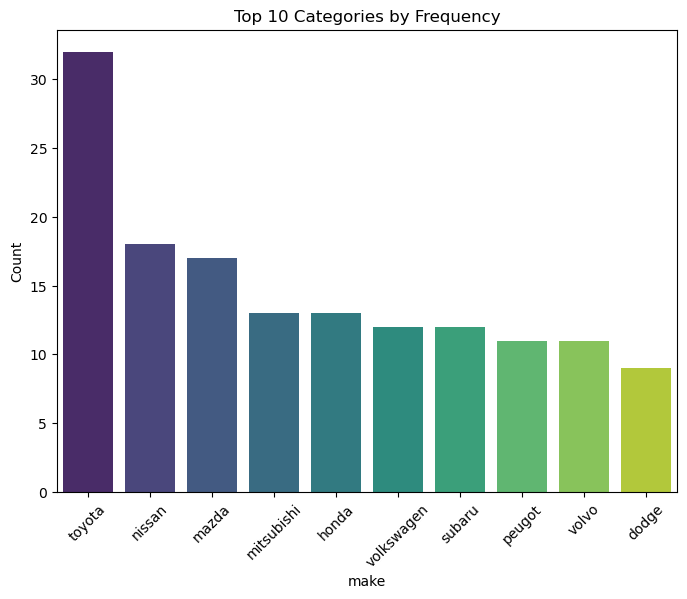

In [17]:
category_counts = data['make'].value_counts()

# Step 2: Plot the top 10 categories
top_10 = category_counts[:10]
plt.figure(figsize=(8, 6))
sns.barplot(x=top_10.index, y=top_10.values, palette="viridis")

# Step 3: Add titles and labels
plt.title("Top 10 Categories by Frequency")
plt.xlabel("make")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

##### What is/are the insight(s) found from the chart?
- From the above chart, we got to know that ,Mass-market brands like Toyota, nissan,  ,mazda and honda offer more affordable options.

##### Create new dataframe for Categorical columns only.

In [18]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_columns.tolist())

Categorical Columns:
['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [19]:
#dataframe of categorical columns
data1=data[[
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 
]]

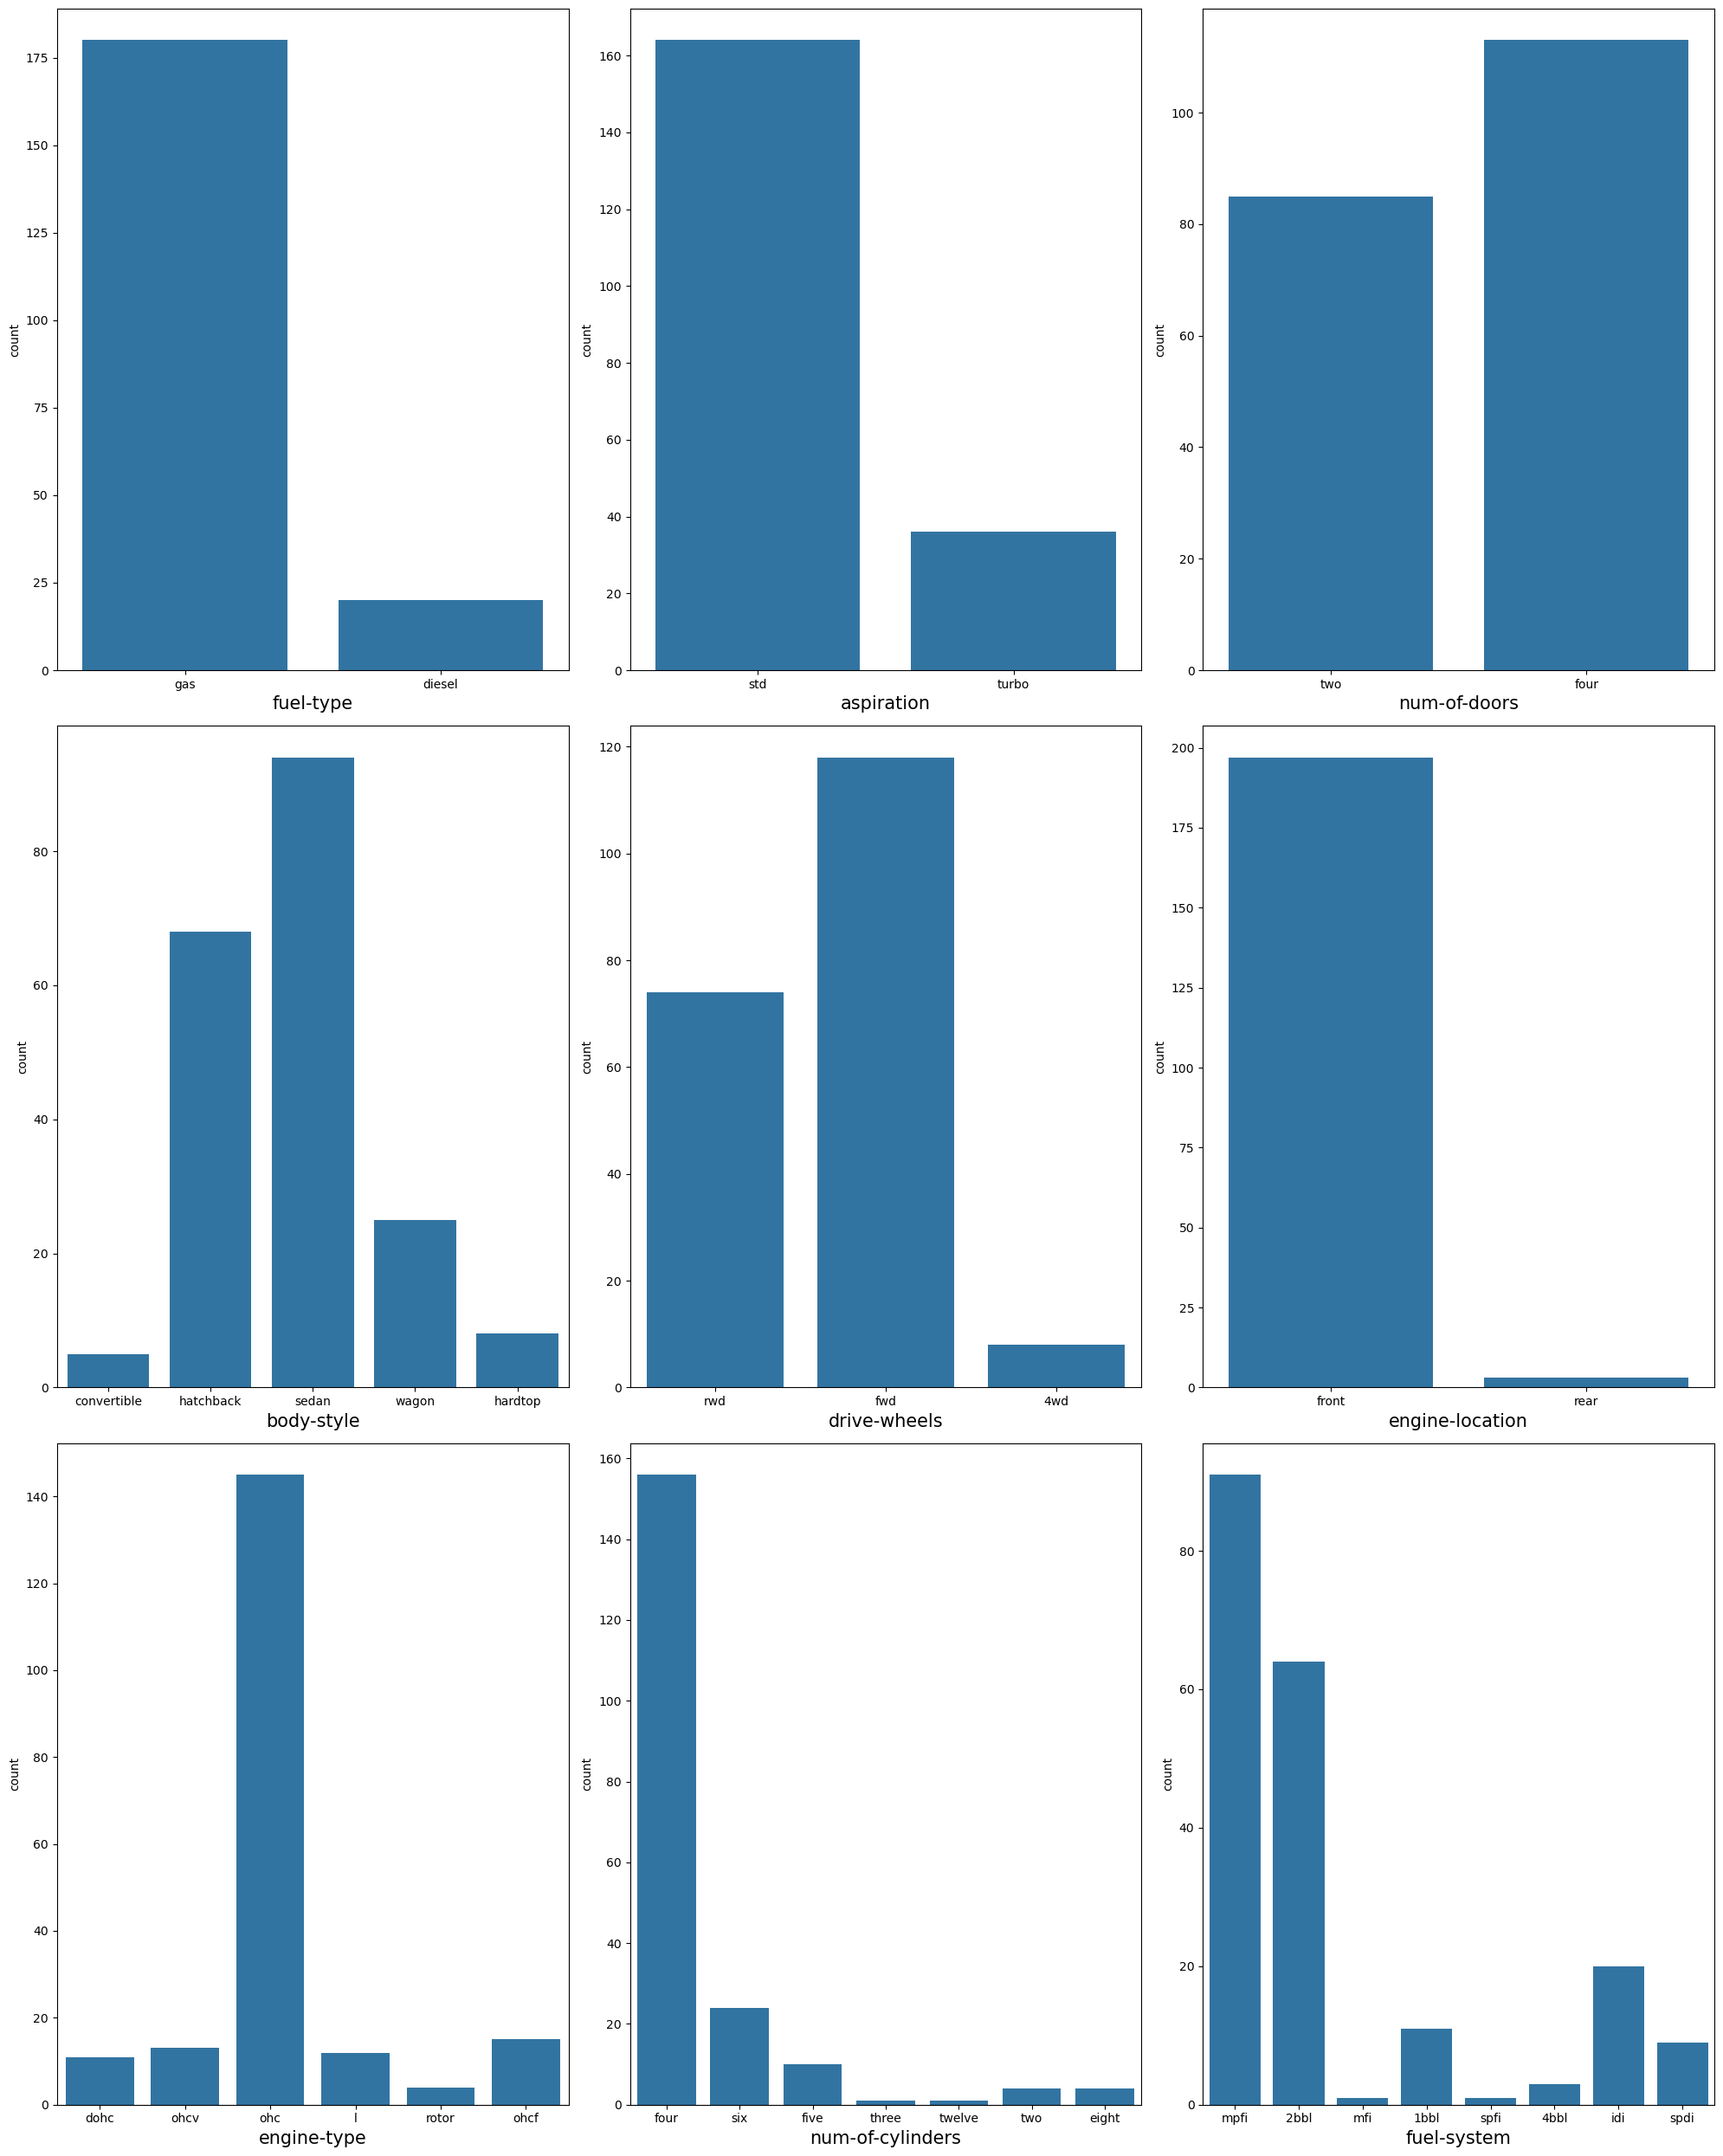

In [20]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x= column,data = data)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()
        

#### What is/are the insight(s) found from the chart?

From the above plots we can analyse that:

* The number of cars having their 'Fuel_Type' type as gas is greater then compared to the diesel
* A higher proportion of "std" vehicles might suggest that the market is currently trending towords simple,r more affordable vehicles,
* The countplot reveals that four-door vehicles dominate the dataset, suggesting a strong market preference for practicality and potentially influencing price trends.
* The countplot reveals that sedans are the most common body style in the dataset, suggesting a strong market preference for this traditional vehicle type.
* The countplot shows that front-wheel drive (FWD) vehicles are the most prevalent, indicating a strong market preference likely driven by fuel efficiency and ease of handling.
* front-engine vehicles are overwhelmingly dominant, reflecting a common design choice in the automotive industry.
* The countplot reveals "ohc" as the most prevalent engine type, highlighting its dominance likely due to its balance of performance and cost-effectiveness.
* The countplot reveals that four-cylinder engines are the most common, followed by other engines.
* The countplot shows "mpfi" as the most common fuel system, reflecting the industry's shift towards more efficient and electronically controlled fuel delivery.






















### Univariate analysis for Numerical columns.

##### Create new dataframe for Numerical columns only.

In [21]:
numerical_columns = data.select_dtypes(include=['number']).columns
print("Numerical Columns:")
print(numerical_columns.tolist())

Numerical Columns:
['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rmp', 'city-mpg', 'highway-mpg', 'price']


In [22]:
#dataframe of numerical columns
data2=data[['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'bore',
 'stroke',
 'horsepower',           
 'peak-rmp',          
 'city-mpg',
 'highway-mpg',
 'price'
 
]]

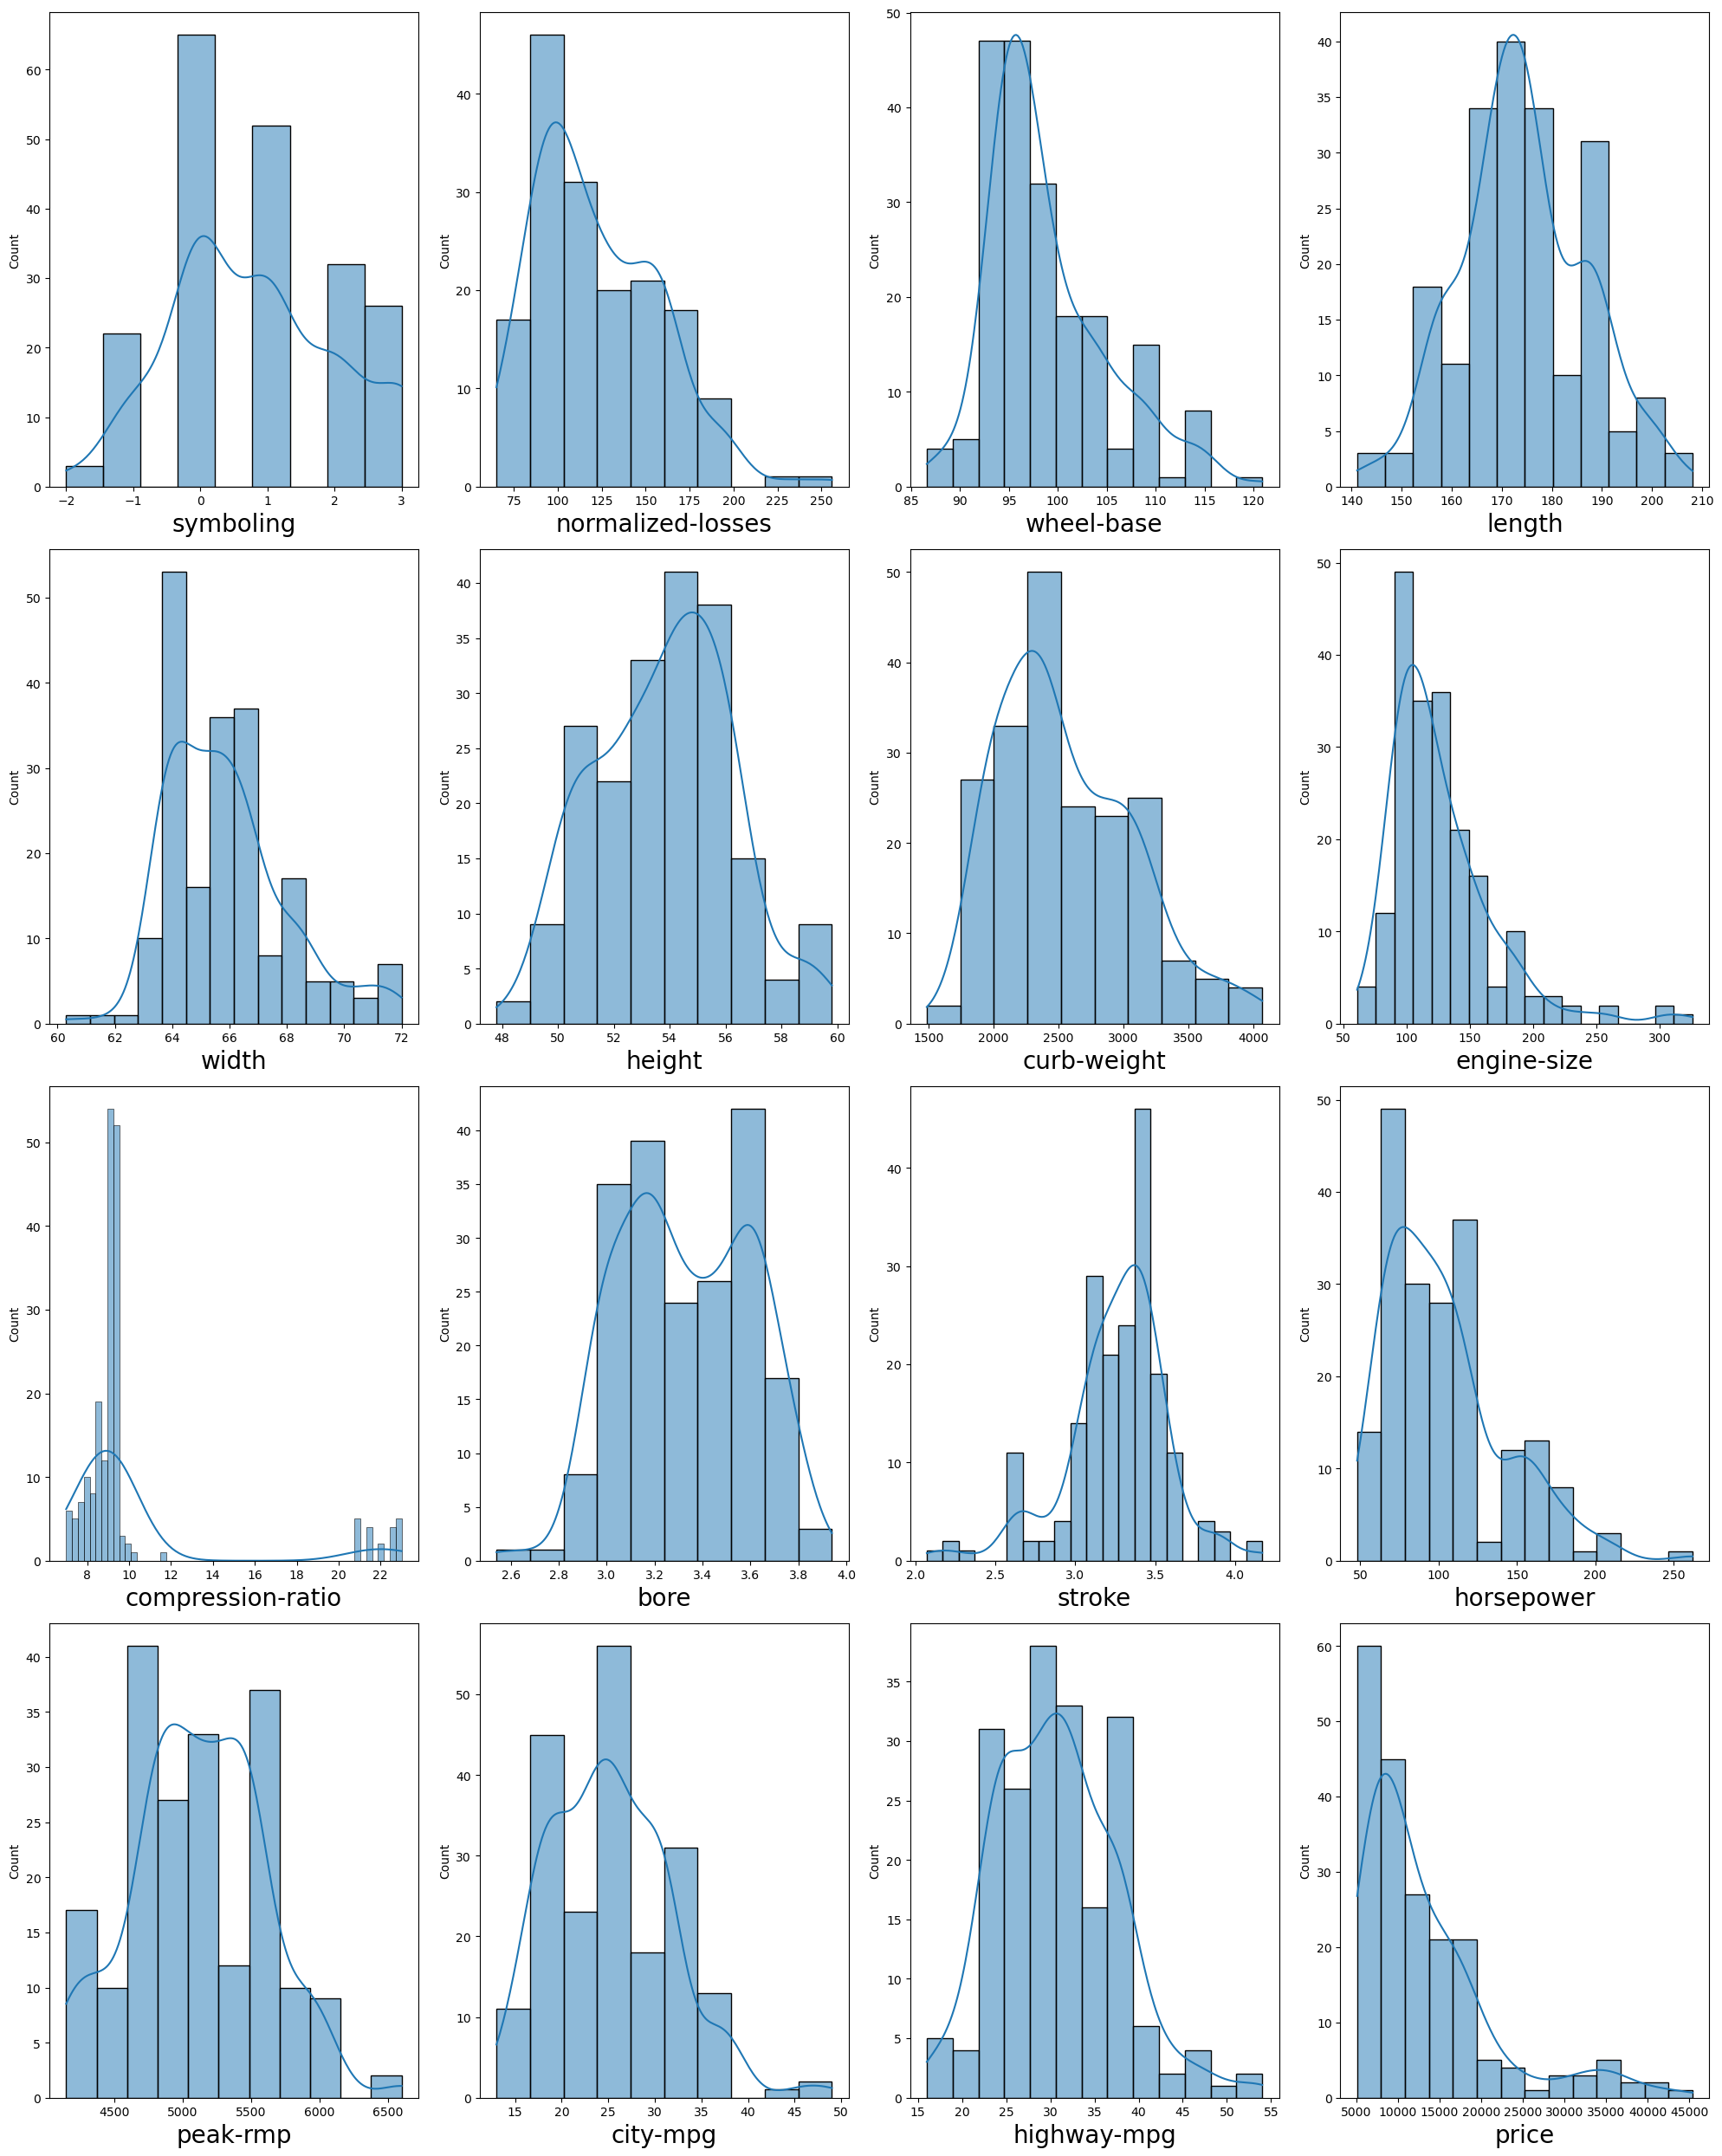

In [23]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x= column,data = data,kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### What is/are the insight(s) found from the chart?

* Symboling is evenly distributed around the mean with a slight right skew. 
* Normalized Losses and Curb-Weight exhibit right-skewed distributions, suggesting potential outliers. 
* Wheel-base, Length, Width, and Height show concentrated distributions around the mean, indicating less variability.
* Engine-Size also displays a right-skewed distribution with potential outliers for large engines.
*Dimensions like Wheel-base, Length, Width, and Height show less variability.
* Engine-Size and Curb-Weight have potential outliers due to right-skewed distributions.
  Observed in Horsepower, Peak-rpm, City-mpg, Highway-mpg, Compression Ratio, and Price, indicating potential outliers with high values.
* Seen in Bore and Stroke, suggesting most cars have values close to the mean for these dimensions.


## Bivariate analysis 

 #####  possible Bivariate Relationships

#### Numerical vs. Numerical

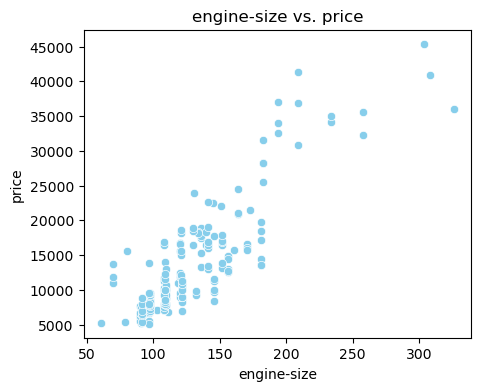

In [24]:
# Scatter plot: Engine size vs. Price
color=['skyblue']
plt.figure(figsize=(5, 4))
sns.scatterplot(x='engine-size', y='price' ,data=data,color=color)
plt.title('engine-size vs. price')
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

#### What is/are the insight(s) found from the chart?

* From the above Scatterplot, it can clearly seen that as the number of engine-size increases, the  Price of the car is also increases.



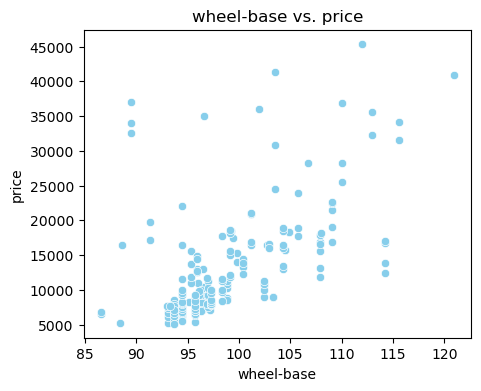

In [25]:
color=['skyblue']
plt.figure(figsize=(5, 4))
sns.scatterplot(x='wheel-base', y='price', data=data,color=color)
plt.title('wheel-base vs. price')
plt.xlabel('wheel-base')
plt.ylabel('price')
plt.show()

#### What is/are the insight(s) found from the chart?

* From the above Scatterplot, it can seen that as the wheel-base increases, the Selling Price of the car tends to increases.



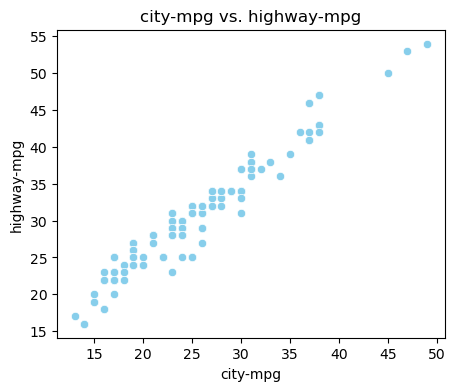

In [26]:
color=['skyblue']
plt.figure(figsize=(5, 4))
sns.scatterplot(x='city-mpg', y='highway-mpg', data=data,color=color)
plt.title('city-mpg vs. highway-mpg')
plt.xlabel('city-mpg')
plt.ylabel('highway-mpg')
plt.show()

#### What is/are the insight(s) found from the chart?

* From the above Scatterplot, it can seen that as the city-mpg increases, the Selling Price of the car tends to increases.


#### Categorical vs. Numerical

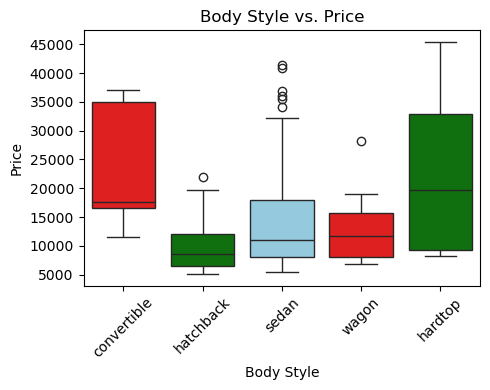

In [27]:
palette = ['red', 'green', 'skyblue']  
# Create the boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(
    x='body-style',
    y='price',
    data=data,
    palette=palette
)
plt.title('Body Style vs. Price')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### What is/are the insight(s) found from the chart?

* The box plot visualizes the distribution of prices for different body styles of cars.
* This body style has the highest median price and a wide range, with some very expensive convertibles.
* This body style also has a high median price and a wide range, indicating significant price variation.
* The median price for wagons is lower than convertibles and hardtops, and the range is also narrower.
* Hatchbacks have the lowest median price among these body styles, and the range is relatively narrow, suggesting less price variation.
* Sedans show a moderate median price and a moderate range, falling between hatchbacks and the more expensive body styles.



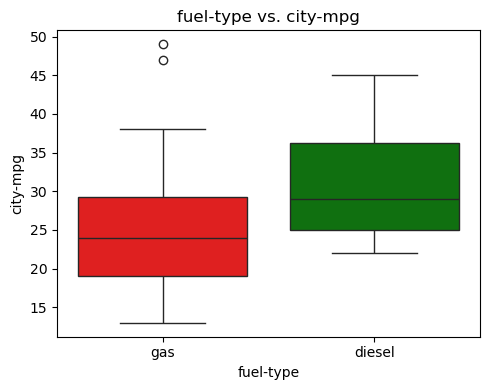

In [28]:
palette = ['red', 'green']  
# Create the boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(
    x='fuel-type',
    y='city-mpg',
    data=data,
    palette=palette
)
plt.title('fuel-type vs. city-mpg')
plt.xlabel('fuel-type')
plt.ylabel('city-mpg')
plt.tight_layout()
plt.show()

#### What is/are the insight(s) found from the chart?

* Based on the box plot, it can be inferred that diesel cars generally offer better fuel efficiency in city driving conditions compared to gas cars.

## ***4.Data Preprocessing and Feature Engineering.***


In [29]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       198 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

### Handling missing values

In [31]:
## cheking for missing values
data.isnull().sum()

symboling             0
normalized-losses    36
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rmp              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

# <span style="font-family: Arial, sans-serif; font-size: 14px; color: black;"> 1) normalized-losses.</span>

In [32]:
# Getting the null values in normalized-losses.
data['normalized-losses'].isnull().sum()

36

In [33]:
## How much values have been missed
data['normalized-losses'].isnull().sum()/len(data)*100

18.0

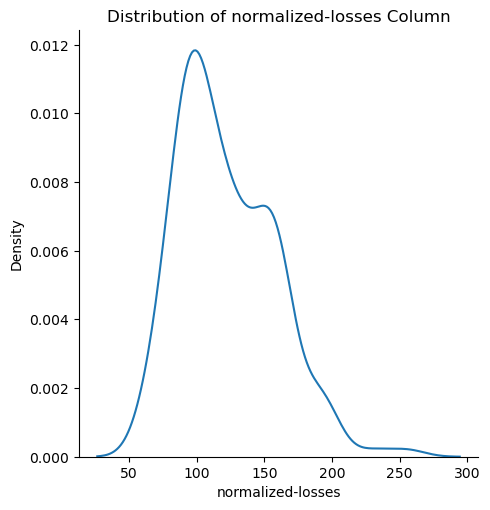

In [34]:
sns.displot(data['normalized-losses'], kind="kde", fill=False) 

# Customize the plot .
plt.title("Distribution of normalized-losses Column")
plt.xlabel("normalized-losses")
plt.ylabel("Density")

 
plt.show()

##### Since data is right skewed, we can use median to replace the nan value. It is recommended to use mean only for symmetric data distribution.


In [35]:
# Check median for normalized-losse column
np.median(data['normalized-losses'].dropna(axis=0))

115.0

In [36]:
# Replace the nan values in normalized-losses column with median value
data.loc[data['normalized-losses'].isnull()==True,'normalized-losses']=np.median(data['normalized-losses'].dropna(axis=0))

In [37]:
data['normalized-losses'].isnull().sum()

0

# <span style="font-family: Arial, sans-serif; font-size: 14px; color: black;"> 2) num-of-doors.</span>

In [38]:
## Getting the rows where values are missed in num-of-doors features.
data.loc[data['num-of-doors'].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558
59,0,115.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795


In [39]:
data['num-of-doors'].isnull().sum() # null value count

2

In [40]:
data['num-of-doors'].value_counts()

num-of-doors
four    113
two      85
Name: count, dtype: int64

### Imputing missing values with mode.
As 'num-of-doors' is the categorical columns ,we imputing the missing values with mode.
Replacing missing values in categorical columns with the higher value counts is a simple and effective technique for handling missing data.here the 'four' is higher values counts thats why we convert missing values with four.

In [41]:
## Imputing the missing values with mode
data.loc[data['num-of-doors'].isnull()==True,'num-of-doors']='four'

In [42]:
data['num-of-doors'].isnull().sum() 

0

# <span style="font-family: Arial, sans-serif; font-size: 14px; color: black;"> 3) bore.</span>

In [43]:
## Getting the rows where values are missed in bore features.
data.loc[data['bore'].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
51,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945
52,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845
53,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645
54,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645


In [44]:
# Getting the null values in bore
data.bore.isnull().sum() 

4

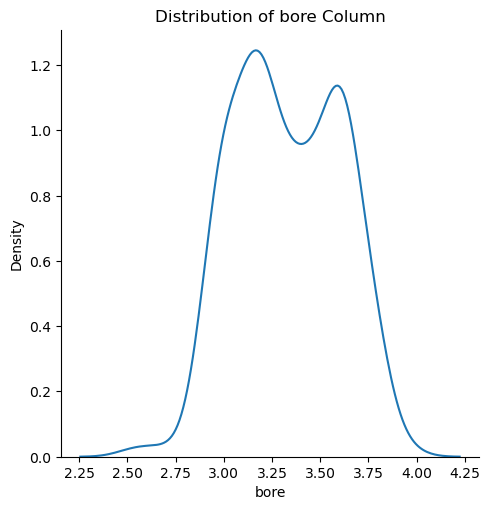

In [45]:
sns.displot(data['bore'], kind="kde", fill=False) 

# Customize the plot .
plt.title("Distribution of bore Column")
plt.xlabel("bore")
plt.ylabel("Density")

 
plt.show()

##### Since data is skewed, we can use median to replace the nan value. 



In [46]:
# Check median for bore column
np.median(data.bore.dropna(axis=0))

3.31

In [47]:
# Replace the nan values in bore column with median value
data.loc[data['bore'].isnull()==True,'bore']=np.median(data.bore.dropna(axis=0))

In [48]:
data.bore.isnull().sum()

0

# <span style="font-family: Arial, sans-serif; font-size: 14px; color: black;"> 4) stroke.</span>

In [49]:
## Getting the rows where values are missed in stroke features.
data.loc[data['stroke'].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
51,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.31,NaN,9.4,101.0,6000.0,17,23,10945
52,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.31,NaN,9.4,101.0,6000.0,17,23,11845
53,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.31,NaN,9.4,101.0,6000.0,17,23,13645
54,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.31,NaN,9.4,135.0,6000.0,16,23,15645


In [50]:
# Getting the null values in stroke
data.stroke.isnull().sum() 

4

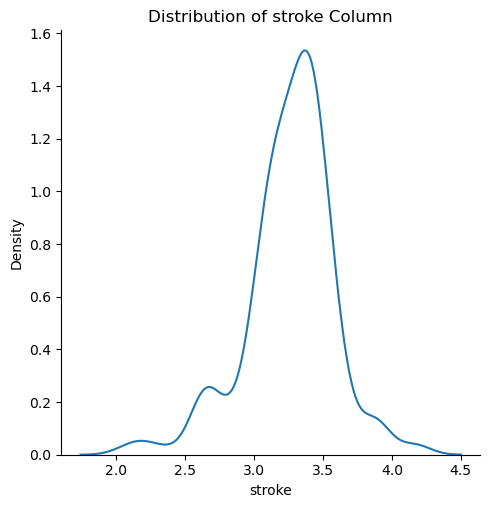

In [51]:
sns.displot(data['stroke'], kind="kde", fill=False) 

# Customize the plot.
plt.title("Distribution of stroke Column")
plt.xlabel("stroke")
plt.ylabel("Density")

 
plt.show()

##### Since data is skewed, we can use median to replace the nan value. 

In [52]:
# Check median for stroke column
np.median(data.stroke.dropna(axis=0))

3.29

In [53]:
# Replace the nan values in stroke column with median value
data.loc[data['stroke'].isnull()==True,'stroke']=np.median(data.stroke.dropna(axis=0))

In [54]:
data.stroke.isnull().sum()

0

# <span style="font-family: Arial, sans-serif; font-size: 14px; color: black;"> 5) horesepower.</span>

In [55]:
## Getting the rows where values are missed in horsepower features.
data.loc[data['horsepower'].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
125,0,115.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
126,2,115.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [56]:
# Getting the null values in horesepower.
data.horsepower.isnull().sum() 

2

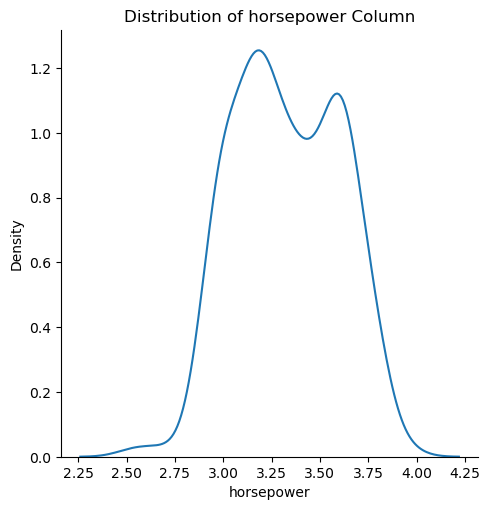

In [57]:
sns.displot(data['bore'], kind="kde", fill=False) 

# Customize the plot .
plt.title("Distribution of horsepower Column")
plt.xlabel("horsepower")
plt.ylabel("Density")

 
plt.show()

##### Since data is also skewed, we can use median to replace the nan value. 

In [58]:
# Check median for horsepower column.
np.median(data.horsepower.dropna(axis=0))

95.0

In [59]:
# Replace the nan values in horsepower column with median value
data.loc[data['horsepower'].isnull()==True,'horsepower']=np.median(data.horsepower.dropna(axis=0))

In [60]:
data.horsepower.isnull().sum()

0

# <span style="font-family: Arial, sans-serif; font-size: 14px; color: black;"> 6) peak-rmp.</span>

In [61]:
## Getting the rows where values are missed in peak-rmp features.
data.loc[data['peak-rmp'].isnull()==True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
125,0,115.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,95.0,NaN,23,31,9295
126,2,115.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,95.0,NaN,23,31,9895


In [62]:
# Getting the null values in peak-rmp.
data['peak-rmp'].isnull().sum() 

2

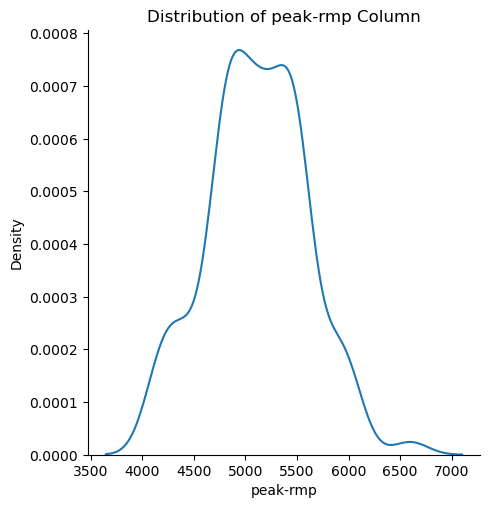

In [63]:
sns.displot(data['peak-rmp'], kind="kde", fill=False) 

# Customize the plot .
plt.title("Distribution of peak-rmp Column")
plt.xlabel("peak-rmp")
plt.ylabel("Density")

 
plt.show()

#####  Since data is also skewed, we can use median to replace the nan value.


In [64]:
# Check median for peak-rmp column.
np.median(data['peak-rmp'].dropna(axis=0))

5200.0

In [65]:
# Replace the nan values in peak-rmp column with median value.
data.loc[data['peak-rmp'].isnull()==True,'peak-rmp']=np.median(data['peak-rmp'].dropna(axis=0))

In [66]:
data['peak-rmp'].isnull().sum()

0

In [67]:
# check all null values are remove or not

In [68]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rmp             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Categorical Encoding

In [69]:
## Categorical data conversion
data1.head()

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,gas,std,two,sedan,fwd,front,ohc,five,mpfi


### 1.make

In [70]:
data['make'].unique()#checking unique value in make column

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [71]:
# Frequency Encoding
frequency_encoding = data['make'].value_counts()
data['make'] = data['make'].map(frequency_encoding)


In [72]:
data.make

0       2
1       2
2       6
3       6
4       6
       ..
195    11
196    11
197    11
198    11
199    11
Name: make, Length: 200, dtype: int64

### Why use Frequency Encoding?
 This method replaces each category with its frequency count.
It reduces dimensionality by encoding the make column as a single numerical column, representing the frequency of each category.
It’s more efficient for high-cardinality categorical data compared to One-Hot Encoding.


### 2.fuel-type

In [73]:
data['fuel-type'].unique()#checking unique value in fuel-type column

array(['gas', 'diesel'], dtype=object)

In [74]:
## Encoding Gender by one hot encoding.
data['fuel-type']=pd.get_dummies(data['fuel-type'],drop_first=True).astype(int)

In [75]:
print(data['fuel-type'])

0      1
1      1
2      1
3      1
4      1
      ..
195    1
196    1
197    1
198    0
199    1
Name: fuel-type, Length: 200, dtype: int32


### 3.aspiration

In [76]:
data['aspiration'].unique()#checking unique value in aspiration column

array(['std', 'turbo'], dtype=object)

In [77]:
## Encoding Gender by one hot encoding.
data['aspiration']=pd.get_dummies(data['aspiration'],drop_first=True).astype(int)

In [78]:
print(data['aspiration'])

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    1
197    0
198    1
199    1
Name: aspiration, Length: 200, dtype: int32


### 4.num-of-doors

In [79]:
data['num-of-doors'].unique()#checking unique value in num-of-doors column

array(['two', 'four'], dtype=object)

In [80]:
## Encoding Gender by one hot encoding.
data['num-of-doors']=pd.get_dummies(data['num-of-doors'],drop_first=True).astype(int)

In [81]:
print(data['num-of-doors'])

0      1
1      1
2      0
3      0
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: num-of-doors, Length: 200, dtype: int32


### 5.engine-location

In [82]:
data['engine-location'].unique()#checking unique value in engine-location column

array(['front', 'rear'], dtype=object)

In [83]:
## Encoding Gender by one hot encoding.
data['engine-location']=pd.get_dummies(data['engine-location'],drop_first=True).astype(int)

In [84]:
print(data['engine-location'])

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: engine-location, Length: 200, dtype: int32


### Why use one-Hot Encoding?

one-Hot encoding is suitable for above columns because ,One-Hot Encoding is ideal for nominal data  because it treats each category as a distinct, non-ordinal entity. It prevents models from mistakenly assuming an ordinal relationship between categories.

### 6.body-style

In [85]:
data['body-style'].unique()#checking unique value in body-style column

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [86]:
data['body-style']=data['body-style'].map({'convertible':4,'hatchback':3,
                                             'sedan':2,'wagon':1,'hardtop':0 })
   

In [87]:
print(data['body-style'])

0      4
1      3
2      2
3      2
4      2
      ..
195    2
196    2
197    2
198    2
199    2
Name: body-style, Length: 200, dtype: int64


### 7.drive-wheels

In [88]:
data['drive-wheels'].unique()#checking unique value in drive-wheels column

array(['rwd', 'fwd', '4wd'], dtype=object)

In [89]:
data['drive-wheels']=data['drive-wheels'].map({'rwd':2,'fwd':1,
                                             '4wd':0 })

In [90]:
print(data['drive-wheels'])

0      2
1      2
2      1
3      0
4      1
      ..
195    2
196    2
197    2
198    2
199    2
Name: drive-wheels, Length: 200, dtype: int64


### 8.engine-type

In [91]:
data['engine-type'].unique()#checking unique value in engine-type column

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [92]:
data['engine-type']=data['engine-type'].map({'dohc':5,'ohcv':4,
                                             'ohc':3,'l':2,'rotor':1,'ohcf':0 })

In [93]:
print(data['engine-type'])

0      5
1      4
2      3
3      3
4      3
      ..
195    3
196    3
197    4
198    3
199    3
Name: engine-type, Length: 200, dtype: int64


### 9.num-of-cylinders

In [94]:
data['num-of-cylinders'].unique()#checking unique value in num-of-cylinders column

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [95]:
data['num-of-cylinders']=data['num-of-cylinders'].map({'four':6,'six':5,
                                             'five':4,'three':3,'twelve':2,'two':1,'eight':0 })

In [96]:
print(data['num-of-cylinders'])

0      6
1      5
2      6
3      4
4      4
      ..
195    6
196    6
197    5
198    5
199    6
Name: num-of-cylinders, Length: 200, dtype: int64


### 10. fuel-system

In [97]:
data['fuel-system'].unique()#checking unique value in fuel-system column

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [98]:
data['fuel-system']=data['fuel-system'].map({'mpfi':7,'2bbl':6,
                                             'mfi':5,'1bbl':4,'spfi':3,'4bbl':2,'idi':1,'spdi':0 })

In [99]:
print(data['fuel-system'])

0      7
1      7
2      7
3      7
4      7
      ..
195    7
196    7
197    7
198    1
199    7
Name: fuel-system, Length: 200, dtype: int64


### Why use  Manual encoding?

Manual encoding is suitable for above columns due to the small number of categories, the potential for meaningful mappings using domain knowledge, avoiding library dependencies, and enabling custom grouping or prioritization.

In [100]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
0,3,115.0,2,1,0,1,4,2,0,88.6,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,115.0,2,1,0,1,3,2,0,94.5,...,152,7,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,6,1,0,0,2,1,0,99.8,...,109,7,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,6,1,0,0,2,0,0,99.4,...,136,7,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,115.0,6,1,0,1,2,1,0,99.8,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,15250


## Handling the outliers

*  handling outliers from categorical data 

In [101]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
def handle_categorical_outliers(data, col, threshold=0.05, replacement='Other'):
    value_counts = data[col].value_counts(normalize=True)
    infrequent_categories = value_counts[value_counts < threshold].index
    data[col] = data[col].apply(lambda x: replacement if x in infrequent_categories else x)
    return data

for col in categorical_cols:
    data = handle_categorical_outliers(data, col)
print(data)

     symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0            3              115.0     2          1           0             1   
1            1              115.0     2          1           0             1   
2            2              164.0     6          1           0             0   
3            2              164.0     6          1           0             0   
4            2              115.0     6          1           0             1   
..         ...                ...   ...        ...         ...           ...   
195         -1               95.0    11          1           0             0   
196         -1               95.0    11          1           1             0   
197         -1               95.0    11          1           0             0   
198         -1               95.0    11          0           1             0   
199         -1               95.0    11          1           1             0   

     body-style  drive-wheels  engine-l

This frequency-based approach is a common and effective technique for handling outliers in categorical data, particularly when dealing with datasets with a large number of categories or when the presence of rare categories is likely to negatively impact the analysis or model performance.







* handling ouliers from Numerical data

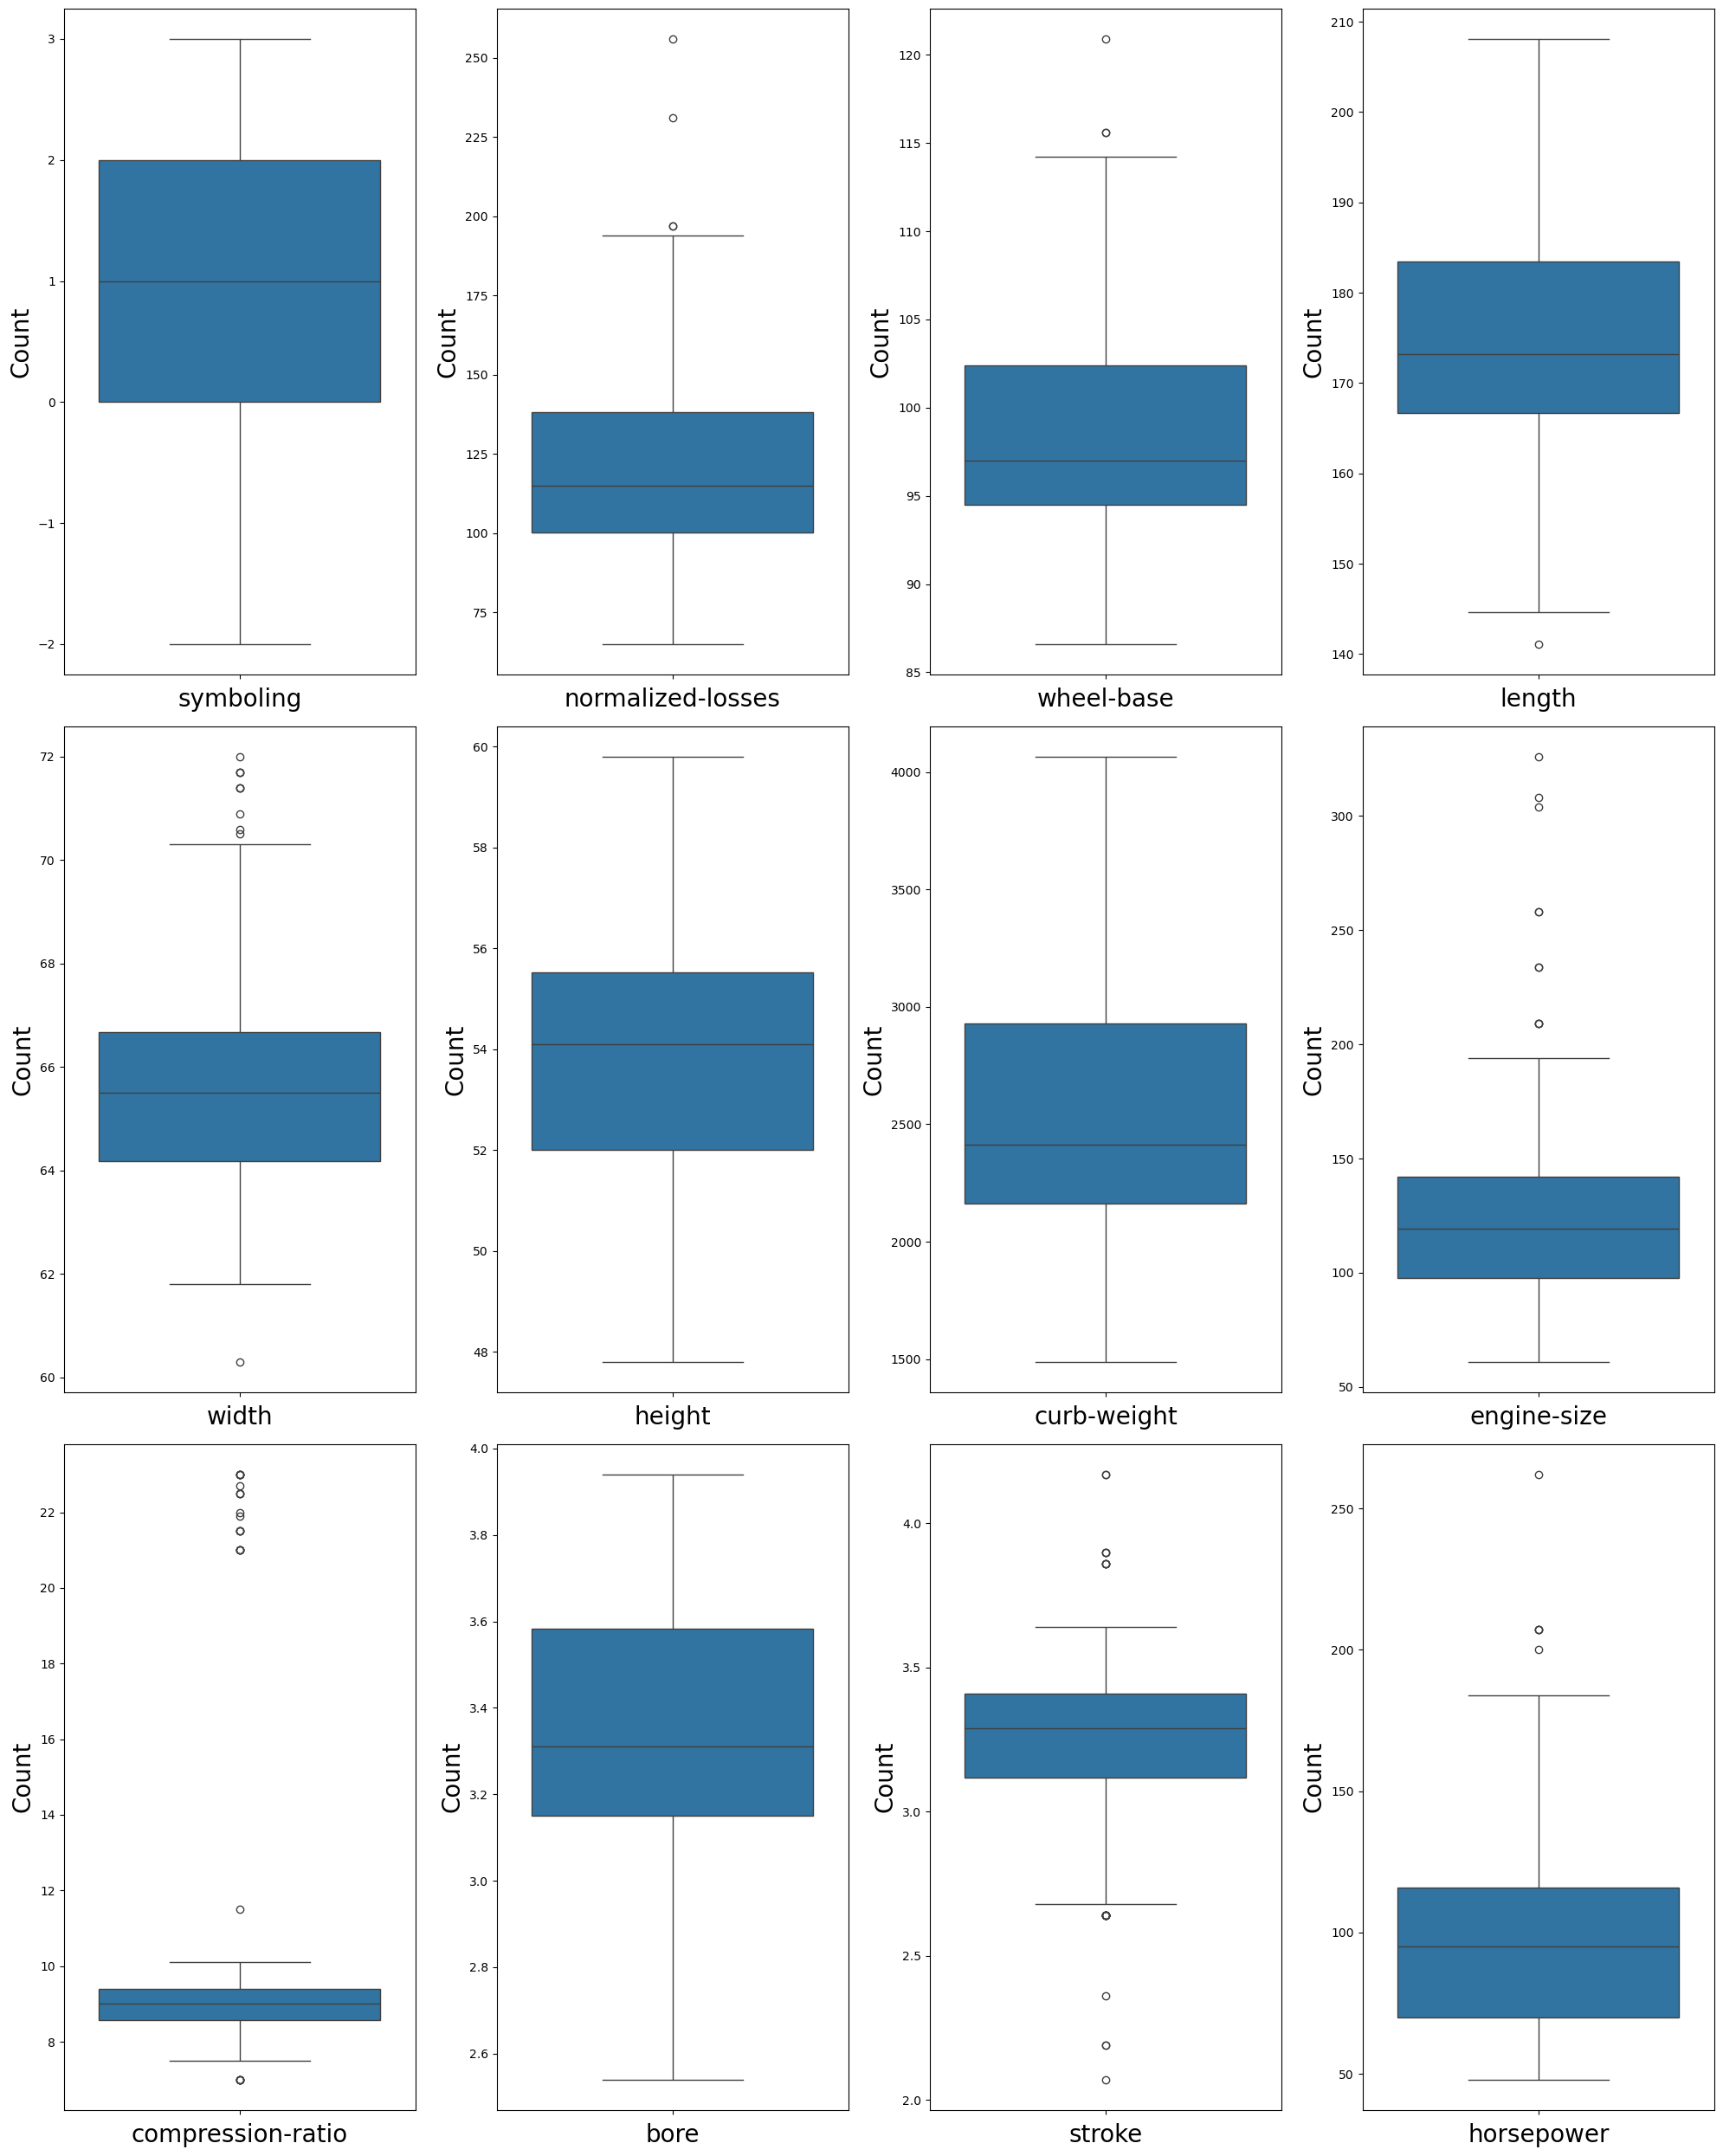

In [102]:
## Checking the outliers for numerical columns 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### 1).normalized-losses

In [103]:
# Calculate quartiles
Q1 = data['normalized-losses'].quantile(0.25)
Q3 = data['normalized-losses'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

38.0

In [104]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


43.25
195.25


In [105]:
# Remove outliers
data = data[(data['normalized-losses'] >= lower_bound) & (data['normalized-losses'] <= upper_bound)]

#### 2).wheel-base

In [106]:
# Calculate quartiles
Q1 = data['wheel-base'].quantile(0.25)
Q3 = data['wheel-base'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

7.900000000000006

In [107]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


82.64999999999999
114.25000000000001


In [108]:
# Remove outliers
data = data[(data['wheel-base'] >= lower_bound) & (data['wheel-base'] <= upper_bound)]

#### 3).width

In [109]:
# Calculate quartiles
Q1 = data['width'].quantile(0.25)
Q3 = data['width'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

2.4000000000000057

In [110]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


60.499999999999986
70.10000000000001


In [111]:
# Remove outliers
data = data[(data['width'] >= lower_bound) & (data['width'] <= upper_bound)]

#### 4).engine size

In [112]:
# Calculate quartiles
Q1 = data['engine-size'].quantile(0.25)
Q3 = data['engine-size'].quantile(0.75)


In [113]:
# Calculate IQR
IQR = Q3 - Q1
IQR

42.0

In [114]:
 #Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


34.0
202.0


In [115]:
# Remove outliers
data = data[(data['engine-size'] >= lower_bound) & (data['engine-size'] <= upper_bound)]

#### 5).compression-ratio

In [116]:
# Calculate quartiles
Q1 = data['compression-ratio'].quantile(0.25)
Q3 = data['compression-ratio'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

0.7000000000000011

In [117]:
 #Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


7.649999999999998
10.450000000000003


In [118]:
# Remove outliers
data = data[(data['compression-ratio'] >= lower_bound) & (data['compression-ratio'] <= upper_bound)]

#### 6).stroke

In [119]:
# Calculate quartiles
Q1 = data['stroke'].quantile(0.25)
Q3 = data['stroke'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

0.33000000000000007

In [120]:
#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


2.5749999999999997
3.895


In [121]:
# Remove outliers
data = data[(data['stroke'] >= lower_bound) & (data['stroke'] <= upper_bound)]

#### 7).horsepower

In [122]:
# Calculate quartiles
Q1 = data['horsepower'].quantile(0.25)
Q3 = data['horsepower'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

42.0

In [123]:
#Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


7.0
175.0


In [124]:
# Remove outliers
data = data[(data['horsepower'] >= lower_bound) & (data['horsepower'] <= upper_bound)]

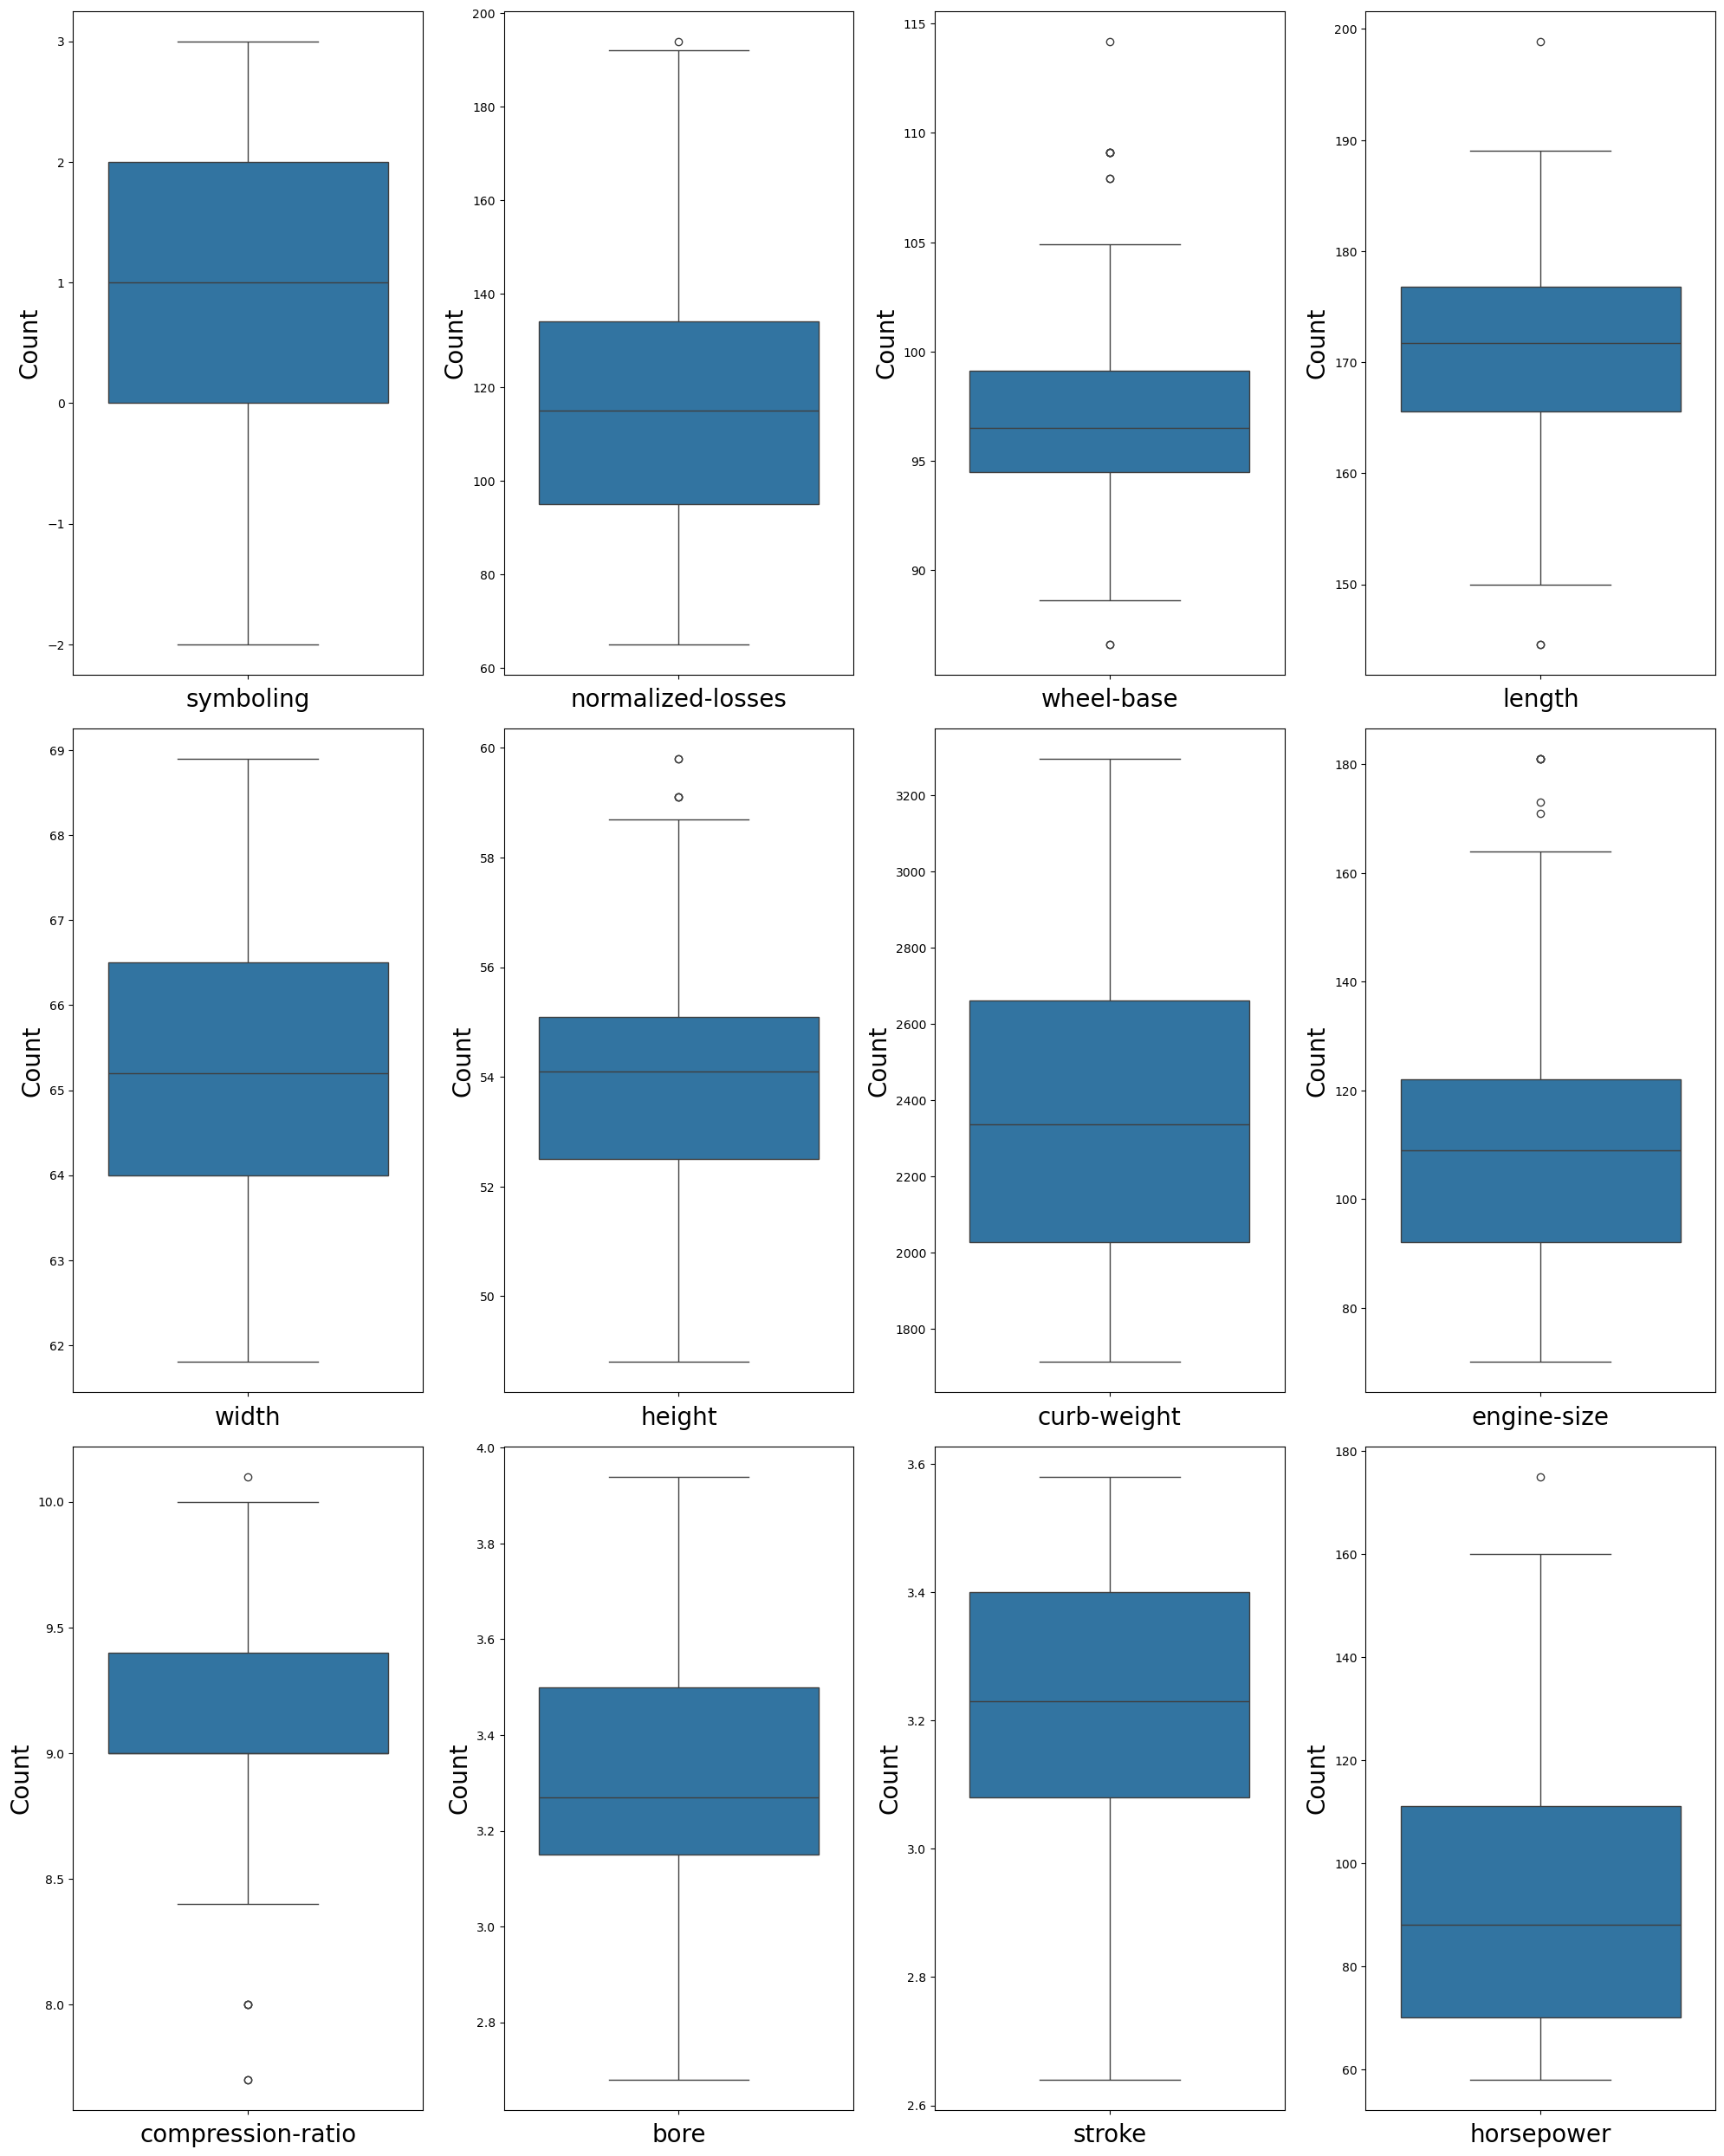

In [125]:
## Checking the outliers for numerical columns 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data2:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### What all outlier treatment techniques have you used and why did you use those techniques?
Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of Selling Price and convert those outliers into median values

### Scaling the continous variable


In [126]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
numerical_cols = data.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = StandardScaler()

# Scale only numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


##### Which method have i used to scale the data and why?

Car features have varying scales (mileage, engine size, age).
Standardization improves model performance and prevents features with larger magnitudes from dominating predictions.









## Feature Selection

In [127]:

numeric_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 
               'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 
               'horsepower', 'peak-rmp', 'city-mpg', 'highway-mpg', 'price'] 
data_numeric = data[numeric_cols]



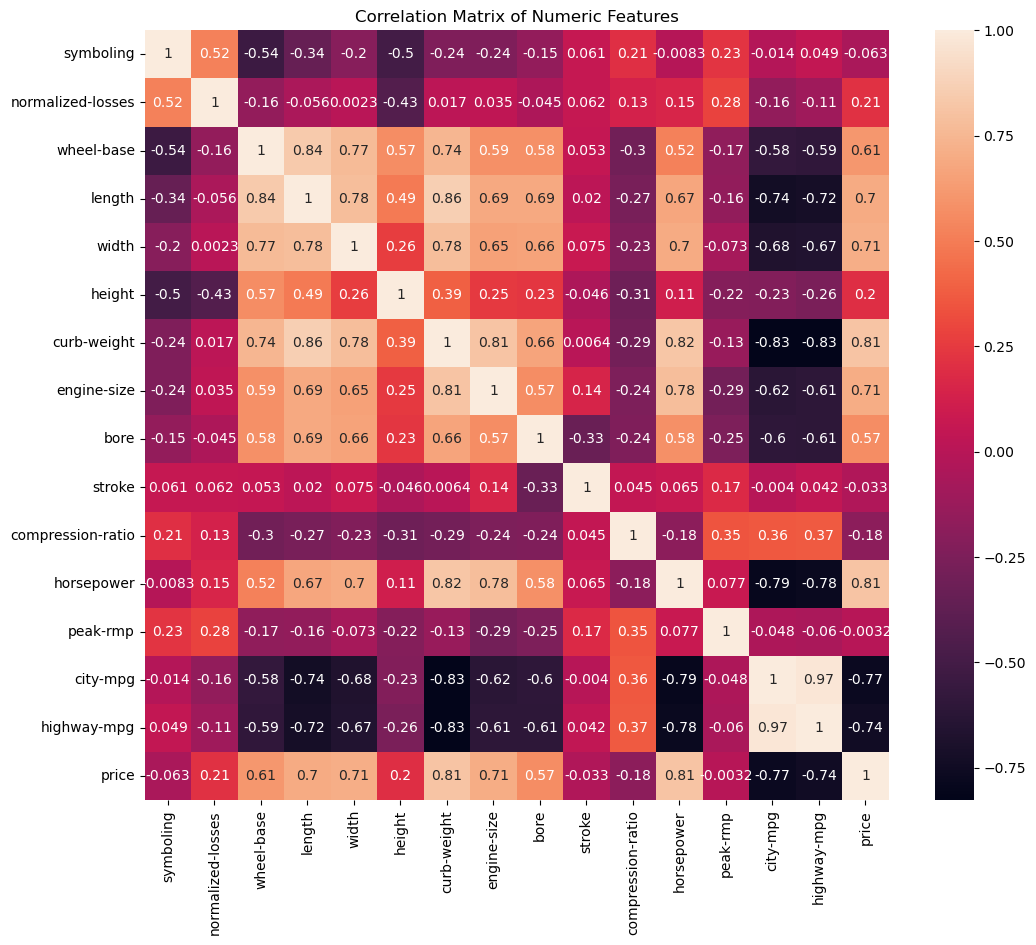

In [128]:
correlation_matrix = data_numeric.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True ) # cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### insights

* we can verify the prasence of multicolinearity between some of the variable.
for instance,the length  column has correlation of 0.86 and 0.84 with the curb-weight and wheel-base respectively.
this is because this three columns essentially contains the same information,which is physicaly distance.
therefor we pick one of the three columns when we go for further analysis

* another multicolinearity  is between city-mpg and high-mpg ,ther city-mpg has a corrlation of 0.97 with high-mpg .

* also multicolinearity between horsepower and symboling we have to delete one of them.we we delete the column symboling which is not more related to output column.

In [129]:
## ## Removing constant features
data.drop(['curb-weight','wheel-base' ,'normalized-losses','symboling','city-mpg'], axis="columns", inplace=True)#droping those columns which have std=0 

In [130]:
data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,highway-mpg,price
0,-1.541763,0.0,-0.232048,1.184698,2.220493,1.409174,0.0,-0.244485,-0.800980,-2.200296,...,0.297364,0.647364,0.776968,0.675684,-2.187579,-0.123947,0.649390,-0.402141,-0.860329,1.359696
1,-1.541763,0.0,-0.232048,1.184698,0.978830,1.409174,0.0,-0.012422,0.172581,-0.609581,...,-0.803686,1.543210,0.776968,-2.396975,1.052181,-0.123947,2.252724,-0.402141,-1.037569,1.359696
2,-1.095913,0.0,-0.232048,-0.844097,-0.262834,-0.429463,0.0,0.509720,0.659362,0.229963,...,0.297364,-0.207763,0.776968,-0.413360,0.765114,2.294954,0.313808,0.680242,-0.328607,0.773185
3,-1.095913,0.0,-0.232048,-0.844097,-0.262834,-2.268099,0.0,0.509720,0.798442,0.229963,...,-1.904736,0.891685,0.776968,-0.413360,0.765114,-2.542847,0.798537,0.680242,-1.746532,1.578200
4,-1.095913,0.0,-0.232048,1.184698,-0.262834,-0.429463,0.0,0.577405,0.728902,-0.300275,...,-1.904736,0.891685,0.776968,-0.413360,0.765114,-1.333397,0.612103,0.680242,-1.214810,1.072190


In [131]:
data.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'length', 'width', 'height',
       'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rmp', 'highway-mpg',
       'price'],
      dtype='object')

### ***6.ML Model Implementation***


## feature selection

In [132]:
data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,highway-mpg,price
0,-1.541763,0.0,-0.232048,1.184698,2.220493,1.409174,0.0,-0.244485,-0.800980,-2.200296,...,0.297364,0.647364,0.776968,0.675684,-2.187579,-0.123947,0.649390,-0.402141,-0.860329,1.359696
1,-1.541763,0.0,-0.232048,1.184698,0.978830,1.409174,0.0,-0.012422,0.172581,-0.609581,...,-0.803686,1.543210,0.776968,-2.396975,1.052181,-0.123947,2.252724,-0.402141,-1.037569,1.359696
2,-1.095913,0.0,-0.232048,-0.844097,-0.262834,-0.429463,0.0,0.509720,0.659362,0.229963,...,0.297364,-0.207763,0.776968,-0.413360,0.765114,2.294954,0.313808,0.680242,-0.328607,0.773185
3,-1.095913,0.0,-0.232048,-0.844097,-0.262834,-2.268099,0.0,0.509720,0.798442,0.229963,...,-1.904736,0.891685,0.776968,-0.413360,0.765114,-2.542847,0.798537,0.680242,-1.746532,1.578200
4,-1.095913,0.0,-0.232048,1.184698,-0.262834,-0.429463,0.0,0.577405,0.728902,-0.300275,...,-1.904736,0.891685,0.776968,-0.413360,0.765114,-1.333397,0.612103,0.680242,-1.214810,1.072190


In [133]:
# Select the features
selected_features = [
     'engine-size', 'horsepower', 'width', 'length', 
     'highway-mpg', 'make', 'body-style', 'drive-wheels', 'aspiration', 
    'num-of-cylinders', 'fuel-system','fuel-type','num-of-doors','engine-location']

# Separate features (X) and target variable (y)
X = data[selected_features]
y = data['price']

categorical_cols = ['make', 'body-style', 'drive-wheels', 'aspiration', 'num-of-cylinders', 'fuel-system','fuel-type','num-of-doors','engine-location'
]
numerical_cols = ['engine-size', 'horsepower', 'width', 'length', 'highway-mpg']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

#### Reasion to select important features

Having too many features can sometimes cause the model to overfit the training data, meaning it performs well on the training set but poorly on unseen data.

 #### Split data into training and testing sets


In [134]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fit the preprocessor to the training data
X_train_transformed = preprocessor.fit_transform(X_train) 
X_test_transformed = preprocessor.transform(X_test) 


### ML Model - 1 : Linear regression


In [135]:
# Create and train the model
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Make predictions
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}") 


MSE: 0.12221753017301842
MAE: 0.27656978149741224
Train R2: 0.9274188009046438
Test R2: 0.8408289486982486


### Cross validation and Hyperparameter tunning.

In [136]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False]  
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')  
grid_search.fit(X_train_transformed, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Model Parameters: {best_params}")
# Make predictions with the best model
y_test_pred_tuned = best_model.predict(X_test_transformed)
y_train_pred_tuned = best_model.predict(X_train_transformed)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_test_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_test_pred_tuned)
train_r2_tuned = r2_score(y_train, y_train_pred_tuned)
test_r2_tuned = r2_score(y_test, y_test_pred_tuned)

print(f"MSE: {mse_tuned}")
print(f"MAE :{mae_tuned}")
print(f"Train R2: {train_r2_tuned}")
print(f"Test R2: {test_r2_tuned}")

Best Model Parameters: {'fit_intercept': True}
MSE: 0.12221753017301842
MAE :0.27656978149741224
Train R2: 0.9274188009046438
Test R2: 0.8408289486982486


#### Which hyperparameter optimization technique have i used and why?


GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.




##### 'Have i seen any improvement? 

For untuned model, I found R2 score of 0.927418 &  0.840828 for train and test set. And  0.122217 and  0.276569 as MSE and MAE respectively.

For tuned model, I found R2 score of  0.927418   and 0.840828  for train and test set. 

For Both tuned and untuned model, no improvement is seen.



### ML Model - 2 : Lasso regression


In [137]:
# Create a Lasso Regression model
model_lasso = Lasso(alpha=0.1)  # You can tune alpha (regularization strength)
# Fit the model
model_lasso.fit(X_train_transformed, y_train)

# Make predictions
y_train_pred_lasso = model_lasso.predict(X_train_transformed)
y_test_pred_lasso = model_lasso.predict(X_test_transformed)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso Regression:")
print(f"  MSE: {mse_lasso}")
print(f"  MAE: {mae_lasso}")
print(f"  Train R2: {train_r2_lasso}")
print(f"  Test R2: {test_r2_lasso}") 

Lasso Regression:
  MSE: 0.22759362647455447
  MAE: 0.3918823027698765
  Train R2: 0.7136946619076665
  Test R2: 0.7035914836091941


Here i have seen that using Lasso, regression accuracy of the train and test model is  71% and 70% respectively, which seems to be a good model for prediction.

### Cross validation and Hyperparameter tunning.

In [138]:
# Define parameter grid for Lasso (with a wider range of alpha values)
param_grid = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1] 
}

# Create GridSearchCV object
grid_search_lasso = GridSearchCV(estimator=model_lasso, 
                                param_grid=param_grid, 
                                cv=5, 
                                scoring='neg_mean_squared_error') 

# Fit GridSearchCV to find the best alpha
grid_search_lasso.fit(X_train_transformed, y_train)

# Get best parameters
best_alpha = grid_search_lasso.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Create Lasso model with best alpha
best_lasso_model = Lasso(alpha=best_alpha, random_state=42)
best_lasso_model.fit(X_train_transformed, y_train)

# Make predictions
y_train_pred_lasso = best_lasso_model.predict(X_train_transformed)
y_test_pred_lasso = best_lasso_model.predict(X_test_transformed)

# Evaluate the model
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso Regression:")
print(f"  Train R-squared: {train_r2_lasso}")
print(f"  Test R-squared: {test_r2_lasso}")


Best alpha: 0.005
Lasso Regression:
  Train R-squared: 0.9116822628371254
  Test R-squared: 0.8623484704116599


##### Which hyperparameter optimization technique have i used and why?
GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

#### Have i seen any improvement?

After tunning i have seen that there is increase in both train and test performance as 91% and 86% seems very good model for our prediciton

### ML Model - 3 : Dicision Tree 


In [139]:
# Create and train the model
model_dt = DecisionTreeRegressor(random_state=42)  # Set random state for reproducibility
model_dt.fit(X_train_transformed, y_train)
# Make predictions
y_train_pred_dt = model_dt.predict(X_train_transformed)
y_test_pred_dt = model_dt.predict(X_test_transformed)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print(f"MSE: {mse_dt}")
print(f"MAE: {mae_dt}")
print(f"Train R2: {train_r2_dt}")
print(f"Test R2: {test_r2_dt}")

MSE: 0.2961703174163453
MAE: 0.3699458411463486
Train R2: 0.9845227943997862
Test R2: 0.6142800405081299


From the decision tree algorithm i got train R2 score is 98% and test R2 score is 61% which shows the overfitting condition on train dataset.

So, i have decided to tune the data using GridSearchCV.

### Cross validation and Hyperparameter tunning.

In [140]:
# Define the parameter grid for Decision Tree Regressor
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=42)
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model_dt, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error') 

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_transformed, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Create a new model with the best hyperparameters
best_model_dt = DecisionTreeRegressor(**best_params, random_state=42)
best_model_dt.fit(X_train_transformed, y_train)

# Make predictions with the best model
y_train_pred_dt = best_model_dt.predict(X_train_transformed)
y_test_pred_dt = best_model_dt.predict(X_test_transformed)

# Evaluate the best model
mse_dt = mean_squared_error(y_test, y_test_pred_dt)
mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)

print(f" MSE: {mse_dt}")
print(f" MAE: {mae_dt}")
print(f"Train R2: {train_r2_dt}")
print(f" Test R2: {test_r2_dt}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
 MSE: 0.2924821911006609
 MAE: 0.3764644613056957
Train R2: 0.9841867709598391
 Test R2: 0.6190833035275191


##### Which hyperparameter optimization technique have i used and why?
GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

#### Have i seen any improvement?

From the above tuned Decision tree regression, it has seen that earlier we have faced overfitting condition. 

### ML Model - 4: RandomForestRegressor


In [141]:
# Create and train the model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_transformed, y_train)

# Make predictions
y_train_pred_rf = model_rf.predict(X_train_transformed)
y_test_pred_rf = model_rf.predict(X_test_transformed)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"\nRandom Forest Regression:")
print(f"  MSE: {mse_rf}")
print(f"  MAE: {mae_dt}")
print(f"  Train R2: {train_r2_rf}")
print(f"  Test R2: {test_r2_rf}")


Random Forest Regression:
  MSE: 0.21566258820323078
  MAE: 0.3764644613056957
  Train R2: 0.9666588480979476
  Test R2: 0.7191299738902494


From the RandomForest algorithm i got train R2 score is 96% and test R2 score is 71% which shows the overfitting condition on train dataset.

So, i have decided to tune the data using GridSearchCV.



### Cross validation and Hyperparameter tunning.

In [ ]:
# Create a Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
# Define the parameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=model_rf, 
                             param_grid=param_grid, 
                             cv=5,  # Use 5-fold cross-validation
                             scoring='neg_mean_squared_error', 
                             n_jobs=-1)  # Utilize all available CPU cores

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train_transformed, y_train)
# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

# Create a new model with the best hyperparameters
best_model_rf = RandomForestRegressor(**best_params_rf, random_state=42)
best_model_rf.fit(X_train_transformed, y_train)
# Make predictions
y_train_pred_rf = best_model_rf.predict(X_train_transformed)
y_test_pred_rf = best_model_rf.predict(X_test_transformed)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_test_pred_rf)
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest Regression:")
print(f"  MSE: {mse_rf}")
print(f"  MAE: {mae_rf}")
print(f"  Train R2: {train_r2_rf}")
print(f"  Test R2: {test_r2_rf}")

#### Which hyperparameter optimization technique have i used and why?
GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.



#### Have i seen any improvement?

From the above tuned Decision tree regression, also it has seen that earlier we have faced overfitting condition.


### ML Model - 5: XGBRegressor

In [ ]:
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42) 
# Fit the model
model_xgb.fit(X_train_transformed, y_train)

# Make predictions
y_train_pred_xgb = model_xgb.predict(X_train_transformed)
y_test_pred_xgb = model_xgb.predict(X_test_transformed)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost Regression:")
print(f"  MSE: {mse_xgb}")
print(f"  MAE: {mae_xgb}")
print(f"  Train R2: {train_r2_xgb}")
print(f"  Test R2: {test_r2_xgb}")

From the XGB Regression algorithm i got train R2 score is 98% and test R2 score is 63% which also shows the overfitting condition on train dataset.

So, i have decided to tune the data using GridSearchCV.



### Cross validation and Hyperparameter tunning.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7],          # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate (shrinkage)
    'subsample': [0.8, 1.0],        # Subsample ratio of training instances
    'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}
# Create a GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=model_xgb, 
                             param_grid=param_grid, 
                             cv=5, 
                             scoring='neg_mean_squared_error', 
                             n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_xgb.fit(X_train_transformed, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best Hyperparameters for XGBoost: {best_params_xgb}")

# Create a new model with the best hyperparameters
best_model_xgb = XGBRegressor(**best_params_xgb, random_state=42)
best_model_xgb.fit(X_train_transformed, y_train)

# Make predictions
y_train_pred_xgb = best_model_xgb.predict(X_train_transformed)
y_test_pred_xgb = best_model_xgb.predict(X_test_transformed)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost Regression:")
print(f"  MSE: {mse_xgb}")
print(f"  MAE: {mae_xgb}")
print(f"  Train R2: {train_r2_xgb}")
print(f"  Test R2: {test_r2_xgb}")


#### Which hyperparameter optimization technique have i used and why?
GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

#### Have i seen any improvement? 

From the above tuned  XGBregression,it increase the accury but   we have faced overfitting condition.


### 1. Which Evaluation metrics did i consider for a positive business impact and why?


On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.



#### 2. Which ML model did i choose from the above created models as the final prediction model and why?

I have ran a several models like linear regression,Lasso regression, decision tree, random forest, gradient boosting, but amongst them the linear regression and Lasso regression is good but i have selected Lasso Regression model as higher accuracy i achieved 91% training accuracy and 86% testing accuracy. 

### ***Conclusion***


This project explores the automotive industry's intricate dynamics, aiming to predict car prices with machine learning. By analyzing various factors such as fuel type, seller type, and transmission, we uncover valuable insights and select a robust model for accurate price prediction.

##### Key Insights:



* The number of cars having their 'Fuel_Type' type as gas is greater then compared to the diesel
* A higher proportion of "std" vehicles might suggest that the market is currently trending towords simple,r more affordable vehicles
* Various machine learning models were assessed, with the Lasso  model being chosen for car price prediction due to its robust performance.

* The project used the R2 score as the primary evaluation metric to assess model accuracy.

* The Lasso model achieved impressive accuracy with 91% training accuracy and 86% testing accuracy, making it a suitable choice for car price prediction.

The insights provide a holistic understanding of the factors influencing car prices, both from exploratory data analysis and machine learning model perspectives. The Lasso regression model's accuracy underscores its potential for practical applications in the automotive market.

This project has not only equipped us with valuable data science skills but has also deepened our understanding of car pricing, making it a significant step in the field of data science and machine learning.

### ***Thank you***!!